In [1]:
# Import the Pandas library
import pandas as pd
#Import the Numpy library
import numpy as np

#Import 'tree' from scikit-learn library
from sklearn import tree
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Load the train and test datasets to create two DataFrames
train_url = "C:/Users/spawar5/Downloads/train.csv"
train = pd.read_csv(train_url)

test_url = "C:/Users/spawar5/Downloads/test.csv"
test = pd.read_csv(test_url)

#dropping useless variables
train = train.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
test = test.drop(["Name","Ticket","Cabin"], axis=1)

In [7]:
#Dealing with missing values
train["Embarked"] = train["Embarked"].fillna("S")
#train["Age"] = train["Age"].fillna(train["Age"].median())
#train["Age"] = train["Age"].astype(int)

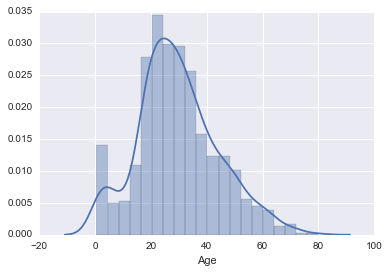

In [8]:
sns.distplot(train["Age"].dropna())


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


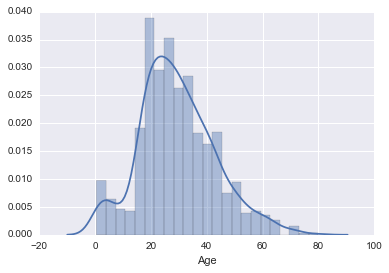

In [9]:
age_mean = train["Age"].mean()
age_std = train["Age"].std()
null_cnt = train["Age"].isnull().sum()
rand_1 = np.random.randint(age_mean - age_std, age_mean + age_std, size = null_cnt)

train["Age"][np.isnan(train["Age"])]=rand_1
sns.distplot(train["Age"])

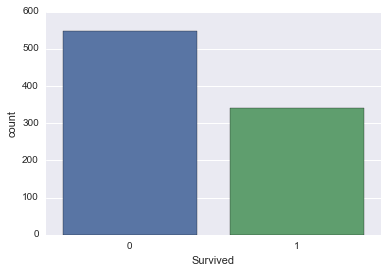

In [10]:
#Initial Visulizations
sns.countplot(x="Survived", data=train)

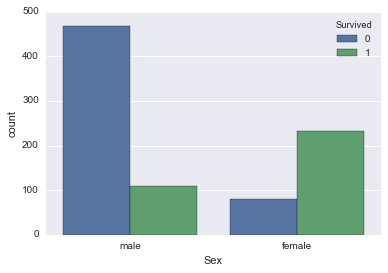

In [11]:
sns.countplot(x="Sex", hue="Survived", data=train)
#percentage of survived male in males is less than percentage of survived female in females

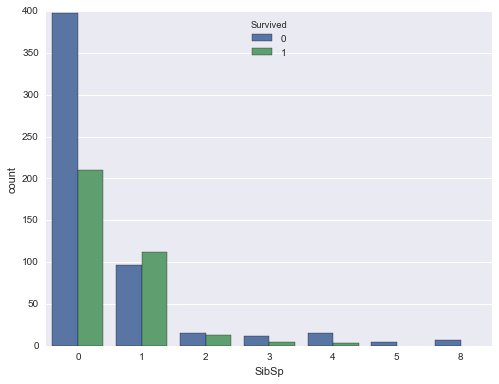

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x="SibSp", hue="Survived", data=train)
#Does not look important predictor

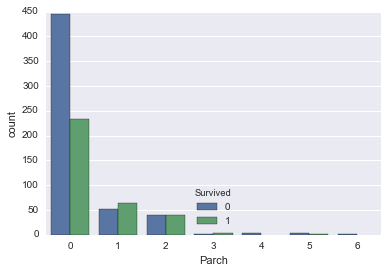

In [13]:
sns.countplot(x="Parch", hue="Survived", data=train)
#may be useful predictor as passengers with 0 Parch have high % of not surviving

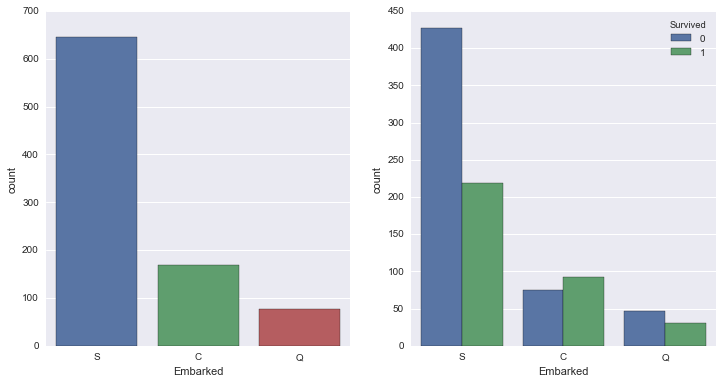

In [14]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x="Embarked", data=train, ax=axis1)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axis2)
#Not sure about this

In [15]:
#Data transformation
#Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

#Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [37]:
#Desicion tree model
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "SibSp", "Age", "Fare", "Embarked"]].values

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_one,target,random_state=1)

my_tree_one = tree.DecisionTreeClassifier(max_depth = 25, min_samples_split = 5, random_state = 1)
#my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(Xtrain,Ytrain)
print(my_tree_one.feature_importances_)
print(my_tree_one.score(Xtrain,Ytrain))

#dot_data = StringIO()  
#tree.export_graphviz(my_tree_one, out_file=dot_data)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("myTree.pdf")
#type(graph)

[ 0.12890272  0.32837712  0.07594512  0.23248661  0.20104442  0.03324401]
0.956586826347


In [38]:
#pred_test = my_tree_one.predict(Xtest)
print(my_tree_one.score(Xtest,Ytest))

0.748878923767


In [39]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 25, min_samples_split=5, random_state = 1)
my_forest = forest.fit(Xtrain, Ytrain)
print(my_forest.score(Xtrain, Ytrain))
print(my_forest.feature_importances_)
print(my_forest.score(Xtest,Ytest))

0.937125748503
[ 0.10716547  0.31505092  0.05939761  0.24222101  0.2321016   0.04406339]
0.793721973094


In [48]:
# Impute the missing values
test.Fare[152] = test["Fare"].median()
age_mean_t = test["Age"].mean()
age_std_t = test["Age"].std()
null_cnt_t = test["Age"].isnull().sum()
rand_2 = np.random.randint(age_mean_t - age_std_t, age_mean_t + age_std_t, size = null_cnt_t)
test["Age"][np.isnan(test["Age"])]=rand_2

#Variable conversions
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2


# Extract the features from the test set
test_features = test[["Pclass", "Sex", "SibSp", "Age", "Fare", "Embarked"]].values

# Make your prediction using the test set
my_prediction = my_forest.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [50]:
my_solution.shape
my_solution.to_csv("my_solution_randomForest.csv", index_label = ["PassengerId"])